<a href="https://colab.research.google.com/github/piaosan78/TensorFlow_2.0_basic/blob/main/CNN_Basic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## CNN 구성하기

### 라이브러이 불러오기

In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import cifar10

%matplotlib inline
tf.__version__

'2.13.0'

### 클래스 네임 작성

In [ ]:
class_name = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship','truck']

# 데이터 분할 및 표준화

In [ ]:
(X_train, y_train),(X_test, y_test) = cifar10.load_data()

170498071/170498071 [==============================] - 11s 0us/step


In [ ]:
print(X_train.shape)
print(X_test.shape)

(50000, 32, 32, 3)
(10000, 32, 32, 3)


In [ ]:
X_train_nomalized = X_train / 255.0
X_test_nomalized = X_test / 255.0

In [ ]:
print(X_train_nomalized)
print(X_test_nomalized)

[[[[0.23137255 0.24313725 0.24705882]
   [0.16862745 0.18039216 0.17647059]
   [0.19607843 0.18823529 0.16862745]
   ...
   [0.61960784 0.51764706 0.42352941]
   [0.59607843 0.49019608 0.4       ]
   [0.58039216 0.48627451 0.40392157]]

  [[0.0627451  0.07843137 0.07843137]
   [0.         0.         0.        ]
   [0.07058824 0.03137255 0.        ]
   ...
   [0.48235294 0.34509804 0.21568627]
   [0.46666667 0.3254902  0.19607843]
   [0.47843137 0.34117647 0.22352941]]

  [[0.09803922 0.09411765 0.08235294]
   [0.0627451  0.02745098 0.        ]
   [0.19215686 0.10588235 0.03137255]
   ...
   [0.4627451  0.32941176 0.19607843]
   [0.47058824 0.32941176 0.19607843]
   [0.42745098 0.28627451 0.16470588]]

  ...

  [[0.81568627 0.66666667 0.37647059]
   [0.78823529 0.6        0.13333333]
   [0.77647059 0.63137255 0.10196078]
   ...
   [0.62745098 0.52156863 0.2745098 ]
   [0.21960784 0.12156863 0.02745098]
   [0.20784314 0.13333333 0.07843137]]

  [[0.70588235 0.54509804 0.37647059]
   [0.6

###  이미지 출력

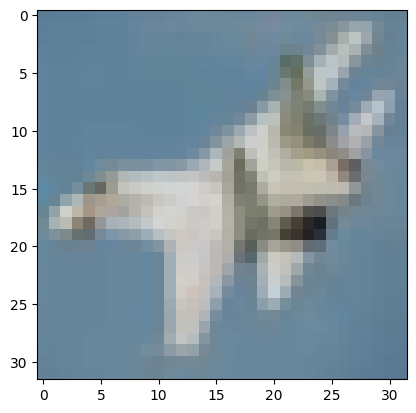

In [ ]:
plt.imshow(X_test[10])

In [ ]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Conv2D(filters = 64, kernel_size = 3, padding = "same", activation = "relu", input_shape = [32,32,3]))
model.add(tf.keras.layers.Conv2D(filters = 64, kernel_size = 3, padding = "same", activation = "relu"))
model.add(tf.keras.layers.MaxPool2D(pool_size = 2, strides = 2, padding = "valid"))
model.add(tf.keras.layers.Dropout(0.25))
model.add(tf.keras.layers.Conv2D(filters = 128, kernel_size = 3, padding = "same", activation = "relu"))
model.add(tf.keras.layers.Conv2D(filters = 128, kernel_size = 3, padding = "same", activation = "relu"))
model.add(tf.keras.layers.MaxPool2D(pool_size = 2, strides = 2, padding = "valid"))
model.add(tf.keras.layers.Dropout(0.25))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(units = 256, activation = "relu"))
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Dense(units = 10, activation = "softmax"))

model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9 (Conv2D)           (None, 32, 32, 64)        1792      
                                                                 
 conv2d_10 (Conv2D)          (None, 32, 32, 64)        36928     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 16, 16, 64)        0         
 g2D)                                                            
                                                                 
 dropout_3 (Dropout)         (None, 16, 16, 64)        0         
                                                                 
 conv2d_11 (Conv2D)          (None, 16, 16, 128)       73856     
                                                                 
 conv2d_12 (Conv2D)          (None, 16, 16, 128)       147584    
                                                      

In [ ]:
from tensorflow.keras.optimizers import Adam, SGD

optimizer = Adam(learning_rate = 0.00001)

model.compile(optimizer = optimizer, loss = "sparse_categorical_crossentropy", metrics = ["sparse_categorical_accuracy"])

In [ ]:
model.fit(X_train_nomalized, y_train, epochs = 30)

Epoch 1/30
1563/1563 [==============================] - 12s 8ms/step - loss: 0.7937 - sparse_categorical_accuracy: 0.7221
Epoch 2/30
1563/1563 [==============================] - 12s 8ms/step - loss: 0.7875 - sparse_categorical_accuracy: 0.7259
Epoch 3/30
1563/1563 [==============================] - 12s 8ms/step - loss: 0.7813 - sparse_categorical_accuracy: 0.7280
Epoch 4/30
1563/1563 [==============================] - 12s 8ms/step - loss: 0.7755 - sparse_categorical_accuracy: 0.7291
Epoch 5/30
1563/1563 [==============================] - 12s 8ms/step - loss: 0.7705 - sparse_categorical_accuracy: 0.7316
Epoch 6/30
1563/1563 [==============================] - 12s 8ms/step - loss: 0.7640 - sparse_categorical_accuracy: 0.7322
Epoch 7/30
1563/1563 [==============================] - 12s 8ms/step - loss: 0.7596 - sparse_categorical_accuracy: 0.7367
Epoch 8/30
1563/1563 [==============================] - 12s 8ms/step - loss: 0.7514 - sparse_categorical_accuracy: 0.7364
Epoch 9/30
1563/1563 [==

In [ ]:
test_loss, test_accuracy = model.evaluate(X_test_nomalized, y_test)
print("Test accuracy: {}".format(test_accuracy))

313/313 [==============================] - 1s 3ms/step - loss: 0.6976 - sparse_categorical_accuracy: 0.7553
Test accuracy: 0.755299985408783
